In [ ]:
import numpy as np
import pandas as pd

In [41]:
# to see the whole dataframe
pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv(r"C:\Users\Cyrus\Documents\Data Projects\bbc nlp\data\politics\politics.csv")

,Category,Text,Filename,Subcategory
0,politics,"Labour plans maternity pay rise\n\nMaternity pay for new mothers is to rise by £1,400 as part of new proposals announced by the Trade and Industry Secretary Patricia Hewitt.\n\nIt would mean paid leave would be increased to nine months by 2007, Ms Hewitt told GMTV's Sunday programme. Other plans include letting maternity pay be given to fathers and extending rights to parents of older children. The Tories dismissed the maternity pay plan as ""desperate"", while the Liberal Democrats said it was misdirected.\n\nMs Hewitt said: ""We have already doubled the length of maternity pay, it was 13 weeks when we were elected, we have already taken it up to 26 weeks. ""We are going to extend the pay to nine months by 2007 and the aim is to get it right up to the full 12 months by the end of the next Parliament."" She said new mothers were already entitled to 12 months leave, but that many women could not take it as only six of those months were paid. ""We have made a firm commitment. We will definitely extend the maternity pay, from the six months where it now is to nine months, that's the extra £1,400."" She said ministers would consult on other proposals that could see fathers being allowed to take some of their partner's maternity pay or leave period, or extending the rights of flexible working to carers or parents of older children. The Shadow Secretary of State for the Family, Theresa May, said: ""These plans were announced by Gordon Brown in his pre-budget review in December and Tony Blair is now recycling it in his desperate bid to win back women voters.""\n\nShe said the Conservatives would announce their proposals closer to the General Election. Liberal Democrat spokeswoman for women Sandra Gidley said: ""While mothers would welcome any extra maternity pay the Liberal Democrats feel this money is being misdirected."" She said her party would boost maternity pay in the first six months to allow more women to stay at home in that time.\n\nMs Hewitt also stressed the plans would be paid for by taxpayers, not employers. But David Frost, director general of the British Chambers of Commerce, warned that many small firms could be ""crippled"" by the move. ""While the majority of any salary costs may be covered by the government's statutory pay, recruitment costs, advertising costs, retraining costs and the strain on the company will not be,"" he said. Further details of the government's plans will be outlined on Monday. New mothers are currently entitled to 90% of average earnings for the first six weeks after giving birth, followed by £102.80 a week until the baby is six months old.\n",data/politics/001.txt,NaN
1,politics,"Watchdog probes e-mail deletions\n\nThe information commissioner says he is urgently asking for details of Cabinet Office orders telling staff to delete e-mails more than three months old.\n\nRichard Thomas ""totally condemned"" the deletion of e-mails to prevent their disclosure under freedom of information laws coming into force on 1 January. Government guidance said e-mails should only be deleted if they served ""no current purpose"", Mr Thomas said. The Tories and the Lib Dems have questioned the timing of the new rules.\n\nTory leader Michael Howard has written to Tony Blair demanding an explanation of the new rules on e-mail retention. On Monday Lib Dem constitutional affairs committee chairman Alan Beith warned that the deletion of millions of government e-mails could harm the ability of key probes like the Hutton Inquiry. The timing of the new rules just before the Freedom of Information Act comes into forces was ""too unlikely to have been a coincidence"", Mr Beith said. But a Cabinet Office spokeswoman said the move was not about the new laws or ""the destruction of important records"". Mr Beith urged the information commissioner to look at how the ""e-mail regime"" could ""support the freedom of information regime"".\n\nMr Thomas said: ""The new Act of Parl

In [43]:
df.head()

,Category,Text,Filename,Subcategory
0,politics,"Labour plans maternity pay rise\n\nMaternity pay for new mothers is to rise by £1,400 as part of new proposals announced by the Trade and Industry Secretary Patricia Hewitt.\n\nIt would mean paid leave would be increased to nine months by 2007, Ms Hewitt told GMTV's Sunday programme. Other plans include letting maternity pay be given to fathers and extending rights to parents of older children. The Tories dismissed the maternity pay plan as ""desperate"", while the Liberal Democrats said it was misdirected.\n\nMs Hewitt said: ""We have already doubled the length of maternity pay, it was 13 weeks when we were elected, we have already taken it up to 26 weeks. ""We are going to extend the pay to nine months by 2007 and the aim is to get it right up to the full 12 months by the end of the next Parliament."" She said new mothers were already entitled to 12 months leave, but that many women could not take it as only six of those months were paid. ""We have made a firm commitment. We will definitely extend the maternity pay, from the six months where it now is to nine months, that's the extra £1,400."" She said ministers would consult on other proposals that could see fathers being allowed to take some of their partner's maternity pay or leave period, or extending the rights of flexible working to carers or parents of older children. The Shadow Secretary of State for the Family, Theresa May, said: ""These plans were announced by Gordon Brown in his pre-budget review in December and Tony Blair is now recycling it in his desperate bid to win back women voters.""\n\nShe said the Conservatives would announce their proposals closer to the General Election. Liberal Democrat spokeswoman for women Sandra Gidley said: ""While mothers would welcome any extra maternity pay the Liberal Democrats feel this money is being misdirected."" She said her party would boost maternity pay in the first six months to allow more women to stay at home in that time.\n\nMs Hewitt also stressed the plans would be paid for by taxpayers, not employers. But David Frost, director general of the British Chambers of Commerce, warned that many small firms could be ""crippled"" by the move. ""While the majority of any salary costs may be covered by the government's statutory pay, recruitment costs, advertising costs, retraining costs and the strain on the company will not be,"" he said. Further details of the government's plans will be outlined on Monday. New mothers are currently entitled to 90% of average earnings for the first six weeks after giving birth, followed by £102.80 a week until the baby is six months old.\n",data/politics/001.txt,NaN
1,politics,"Watchdog probes e-mail deletions\n\nThe information commissioner says he is urgently asking for details of Cabinet Office orders telling staff to delete e-mails more than three months old.\n\nRichard Thomas ""totally condemned"" the deletion of e-mails to prevent their disclosure under freedom of information laws coming into force on 1 January. Government guidance said e-mails should only be deleted if they served ""no current purpose"", Mr Thomas said. The Tories and the Lib Dems have questioned the timing of the new rules.\n\nTory leader Michael Howard has written to Tony Blair demanding an explanation of the new rules on e-mail retention. On Monday Lib Dem constitutional affairs committee chairman Alan Beith warned that the deletion of millions of government e-mails could harm the ability of key probes like the Hutton Inquiry. The timing of the new rules just before the Freedom of Information Act comes into forces was ""too unlikely to have been a coincidence"", Mr Beith said. But a Cabinet Office spokeswoman said the move was not about the new laws or ""the destruction of important records"". Mr Beith urged the information commissioner to look at how the ""e-mail regime"" could ""support the freedom of information regime"".\n\nMr Thomas said: ""The new Act of Parl

In [44]:
# Check dataset shape
print("Shape:", df.shape)

# Null values
print("\nNull values:")
print(df.isnull().sum())

# Duplicate rows
print("\nDuplicates:", df.duplicated().sum())

# Count duplicates only in the Text column
dup_text_count = df["Text"].duplicated().sum()
print("Duplicate Text rows:", dup_text_count)

# Show the actual duplicate texts (if any)
dup_texts = df[df["Text"].duplicated(keep=False)].sort_values("Text")
print(dup_texts)



Shape: (417, 4)

Null values:
Category         0
Text             0
Filename         0
Subcategory    417
dtype: int64

Duplicates: 0
Duplicate Text rows: 14
     Category  \
297  politics   
58   politics   
290  politics   
107  politics   
20   politics   
355  politics   
252  politics   
217  politics   
286  politics   
116  politics   
4    politics   
358  politics   
106  politics   
341  politics   
6    politics   
350  politics   
284  politics   
82   politics   
140  politics   
299  politics   
340  politics   
222  politics   
122  politics   
309  politics   
320  politics   
216  politics   
68   politics   
310  politics   

                                                                                                                                                                                                                                                                                                                                                            

Remove Duplicate Texts

In [45]:
# Drop duplicates in the Text column, keep first occurrence
df = df.drop_duplicates(subset=["Text"]).reset_index(drop=True)

print("After dropping duplicate texts:", df.shape)
print("Remaining duplicates in Text:", df["Text"].duplicated().sum())


After dropping duplicate texts: (403, 4)
Remaining duplicates in Text: 0


Filter Out Very Short News

In [46]:
# Add word count column
df["word_count"] = df["Text"].apply(lambda x: len(x.split()))

# Drop very short texts (e.g., < 30 words)
df = df[df["word_count"] > 30].reset_index(drop=True)

print("After filtering short docs:", df.shape)

After filtering short docs: (403, 5)


Data Cleaning 

In [ ]:
import re

# Cleaning Function
def clean_text(text):
    """
    Lightly cleans raw news text for embeddings:
    - Removes extra line breaks/tabs
    - Normalizes common quotes/apostrophes
    - Keeps punctuation (! ? : ; - / @ &) since LLM embeddings benefit from context
    - Collapses multiple spaces
    """
    # 1. Remove line breaks & tabs
    text = text.replace("\n", " ").replace("\t", " ")

    # 2. Normalize quotes/apostrophes
    text = re.sub(r"[“”]", '"', text)
    text = re.sub(r"[‘’]", "'", text)

    # 3. Keep most punctuation, only strip weird unicode
    text = re.sub(r"[^\x00-\x7F]+", " ", text)  # remove non-ASCII symbols

    # 4. Collapse multiple spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text


# Apply to DataFrame
def clean_dataframe(df):
    if "Text" not in df.columns:
        raise KeyError("DataFrame must have a 'Text' column")

    df["Clean_Text"] = df["Text"].astype(str).apply(clean_text)
    df = df[df["Clean_Text"].str.strip() != ""].reset_index(drop=True)

    return df


# Example Run
df_clean = clean_dataframe(df)
print(df_clean[["Category", "Clean_Text"]].head(3))


   Category  \
0  politics   
1  politics   
2  politics   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [48]:
df.head()

,Category,Text,Filename,Subcategory,word_count,Clean_Text
0,politics,"Labour plans maternity pay rise\n\nMaternity pay for new mothers is to rise by £1,400 as part of new proposals announced by the Trade and Industry Secretary Patricia Hewitt.\n\nIt would mean paid leave would be increased to nine months by 2007, Ms Hewitt told GMTV's Sunday programme. Other plans include letting maternity pay be given to fathers and extending rights to parents of older children. The Tories dismissed the maternity pay plan as ""desperate"", while the Liberal Democrats said it was misdirected.\n\nMs Hewitt said: ""We have already doubled the length of maternity pay, it was 13 weeks when we were elected, we have already taken it up to 26 weeks. ""We are going to extend the pay to nine months by 2007 and the aim is to get it right up to the full 12 months by the end of the next Parliament."" She said new mothers were already entitled to 12 months leave, but that many women could not take it as only six of those months were paid. ""We have made a firm commitment. We will definitely extend the maternity pay, from the six months where it now is to nine months, that's the extra £1,400."" She said ministers would consult on other proposals that could see fathers being allowed to take some of their partner's maternity pay or leave period, or extending the rights of flexible working to carers or parents of older children. The Shadow Secretary of State for the Family, Theresa May, said: ""These plans were announced by Gordon Brown in his pre-budget review in December and Tony Blair is now recycling it in his desperate bid to win back women voters.""\n\nShe said the Conservatives would announce their proposals closer to the General Election. Liberal Democrat spokeswoman for women Sandra Gidley said: ""While mothers would welcome any extra maternity pay the Liberal Democrats feel this money is being misdirected."" She said her party would boost maternity pay in the first six months to allow more women to stay at home in that time.\n\nMs Hewitt also stressed the plans would be paid for by taxpayers, not employers. But David Frost, director general of the British Chambers of Commerce, warned that many small firms could be ""crippled"" by the move. ""While the majority of any salary costs may be covered by the government's statutory pay, recruitment costs, advertising costs, retraining costs and the strain on the company will not be,"" he said. Further details of the government's plans will be outlined on Monday. New mothers are currently entitled to 90% of average earnings for the first six weeks after giving birth, followed by £102.80 a week until the baby is six months old.\n",data/politics/001.txt,NaN,450,"Labour plans maternity pay rise Maternity pay for new mothers is to rise by 1,400 as part of new proposals announced by the Trade and Industry Secretary Patricia Hewitt. It would mean paid leave would be increased to nine months by 2007, Ms Hewitt told GMTV's Sunday programme. Other plans include letting maternity pay be given to fathers and extending rights to parents of older children. The Tories dismissed the maternity pay plan as ""desperate"", while the Liberal Democrats said it was misdirected. Ms Hewitt said: ""We have already doubled the length of maternity pay, it was 13 weeks when we were elected, we have already taken it up to 26 weeks. ""We are going to extend the pay to nine months by 2007 and the aim is to get it right up to the full 12 months by the end of the next Parliament."" She said new mothers were already entitled to 12 months leave, but that many women could not take it as only six of those months were paid. ""We have made a firm commitment. We will definitely extend the maternity pay, from the six months where it now is to nine months, that's the extra 1,400."" She said ministers would consult on other proposals that could see fathers being allowed to take some of their partner's maternity pay or leave period, or extending the ri

In [ ]:
# Use GPU
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


Embedding each article with OpenAI

In [ ]:
import pandas as pd
import hdbscan
from sklearn.metrics.pairwise import cosine_distances
from openai import OpenAI
import json
import random

# Setup client
client = OpenAI(api_key="")


# Embedding Function
def get_embedding(text, model="text-embedding-3-large"):
    response = client.embeddings.create(input=text, model=model)
    return response.data[0].embedding


# Labeling with GPT (Politics)
def label_cluster(docs):
    """Label a group of politics documents with broad reusable categories"""
    sample_text = "\n---\n".join(docs[:3])  # up to 3 docs
    prompt = f"""
You are a topic labeling assistant. 
Your task is to assign a broad, reusable subtopic label.

Here are some example political news articles from the same cluster:
{sample_text}

Guidelines:
- Labels must be broad enough to apply to many similar texts.  
- Use **general categories** like "Elections", "Diplomacy", "Policy", "Conflict", "Governance".  
- Avoid overly specific event names or one-off labels.  
- Keep labels **1–3 words maximum**.  
- Prefer terms that can group other articles in the same domain.  

Respond in JSON format: {{"label": "your label here"}}
"""

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )
    try:
        return json.loads(response.choices[0].message.content)["label"]
    except:
        return response.choices[0].message.content.strip()


def label_single_doc(text):
    """Label a politics article with predefined categories, with flexibility for new ones"""
    first_sentence = text.split(".")[0]
    prompt = f"""You are a topic labeling assistant.
Your task is to assign a broad reusable subtopic label for a politics news article.

Here is a news snippet:
{first_sentence}

Guidelines:
- Prefer one of these predefined politics categories if possible:
  ["Elections", "Diplomacy", "Policy", "Conflict", "Governance", "Labour Party", "Conservative Party"]  
- If the text does not fit any of these, propose a concise new label (1–3 words).  
- Keep labels broad, reusable, and no more than 3 words.  
- Avoid event-specific or one-off names.  

Respond in JSON format: {{"label": "your label here"}}
"""

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )
    try:
        return json.loads(response.choices[0].message.content)["label"]
    except:
        return response.choices[0].message.content.strip()


In [51]:
# ---------- MAIN PIPELINE ----------
results = []

for cat, group in df.groupby("Category"):
    print(f"\nProcessing category: {cat}, n={len(group)}")

    # Step 1: Embeddings
    group["embedding"] = group["Clean_Text"].apply(get_embedding)
    X = np.array(group["embedding"].to_list())

    # Step 2: Cosine distance
    cosine_dist = cosine_distances(X)

    # Step 3: HDBSCAN clustering
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=5,
        min_samples=3,
        metric="precomputed",
        cluster_selection_method="leaf"
    )
    group["Subcluster"] = clusterer.fit_predict(cosine_dist)

    # Step 4: Label clusters
    cluster_labels = {}
    for cluster_id in set(group["Subcluster"]):
        docs = group[group["Subcluster"] == cluster_id]["Clean_Text"].tolist()
        
        if cluster_id == -1:  
            # Noise → label individually
            for idx, doc in group[group["Subcluster"] == -1].iterrows():
                group.at[idx, "Subtopic_Label"] = label_single_doc(doc["Clean_Text"])
        else:
            # Label real clusters
            sample_docs = random.sample(docs, min(3, len(docs)))
            cluster_labels[cluster_id] = label_cluster(sample_docs)
            group.loc[group["Subcluster"] == cluster_id, "Subtopic_Label"] = cluster_labels[cluster_id]

    results.append(group)

# Final combined dataframe
df_subtopics = pd.concat(results).reset_index(drop=True)

# Preview
print(df_subtopics[["Category", "Subcluster", "Subtopic_Label", "Clean_Text"]].head(20))





Processing category: politics, n=403
    Category  Subcluster      Subtopic_Label  \
0   politics          -1              Policy   
1   politics          -1          Governance   
2   politics          -1        Labour Party   
3   politics          -1        Labour Party   
4   politics          -1              Policy   
5   politics          -1          Governance   
6   politics          -1  Conservative Party   
7   politics          -1     Gender Equality   
8   politics          -1          Governance   
9   politics          -1              Policy   
10  politics          -1  Conservative Party   
11  politics          -1          Governance   
12  politics           8           Elections   
13  politics           6          Governance   
14  politics          -1           Diplomacy   
15  politics          -1              Policy   
16  politics          -1              Policy   
17  politics          -1           Diplomacy   
18  politics          -1          Governance   
19

In [52]:
summary = df_subtopics.groupby(["Category", "Subtopic_Label"]).size().reset_index(name="Count")
print(summary.sort_values("Count", ascending=False).head(20))


    Category       Subtopic_Label  Count
21  politics               Policy     97
6   politics            Elections     87
8   politics           Governance     84
2   politics   Conservative Party     30
1   politics             Conflict     22
15  politics         Labour Party     21
3   politics            Diplomacy     18
24  politics    Political Parties      9
13  politics    International Aid      9
14  politics      Labor Relations      5
5   politics     Education Policy      4
23  politics  Political Awareness      1
22  politics     Policy Criticism      1
18  politics     Monarchy Affairs      1
25  politics    Political Protest      1
26  politics        Prison Policy      1
20  politics    Personal Politics      1
19  politics       Party Division      1
0   politics       Climate Policy      1
17  politics        Labour Rights      1


In [54]:
top_subtopics = (
    df_subtopics.groupby(["Category", "Subtopic_Label"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Category", "Count"], ascending=[True, False])
)

# Get top 5 per category
top5_per_category = top_subtopics.groupby("Category").head(5)
print(top5_per_category)


    Category      Subtopic_Label  Count
21  politics              Policy     97
6   politics           Elections     87
8   politics          Governance     84
2   politics  Conservative Party     30
1   politics            Conflict     22


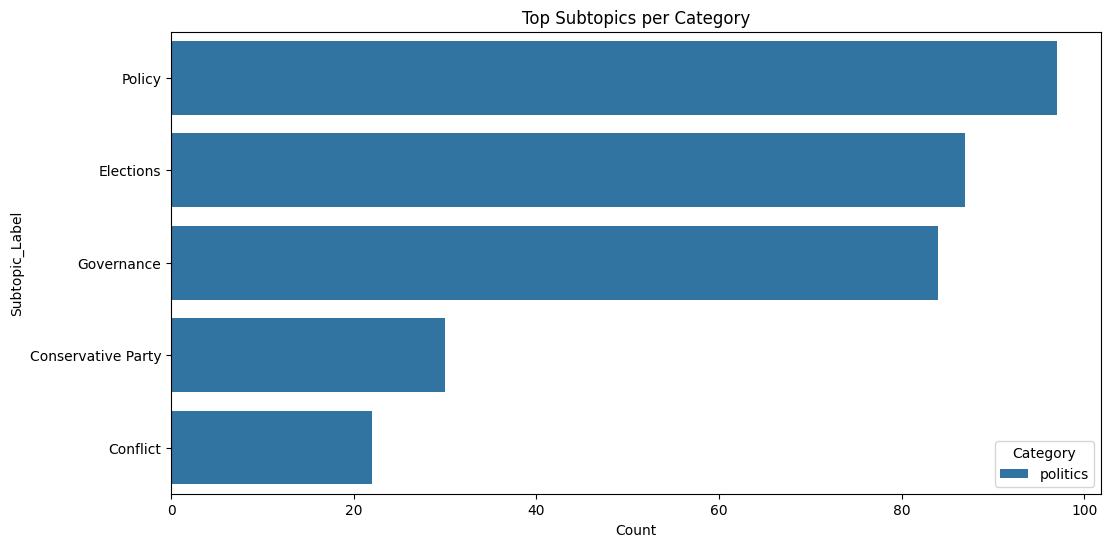

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=top5_per_category,
    x="Count", y="Subtopic_Label", hue="Category"
)
plt.title("Top Subtopics per Category")
plt.show()


We can regex clean those:

In [56]:
import re

def clean_label(label):
    if not isinstance(label, str):
        return label
    # If GPT returned JSON-like text, extract inside
    match = re.search(r'"label"\s*:\s*"([^"]+)"', label)
    if match:
        return match.group(1)
    return label.strip()

df_subtopics["Subtopic_Label"] = df_subtopics["Subtopic_Label"].apply(clean_label)

Rerunning the summary

In [57]:
summary = (
    df_subtopics.groupby(["Category", "Subtopic_Label"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Category", "Count"], ascending=[True, False])
)

top5_per_category = summary.groupby("Category").head(5)
print(top5_per_category)


    Category      Subtopic_Label  Count
21  politics              Policy     97
6   politics           Elections     87
8   politics          Governance     84
2   politics  Conservative Party     30
1   politics            Conflict     22


save the full results into a DataFrame and export to CSV for further analysis or visualization.

In [58]:
import pandas as pd

# Ensure df_subtopics already has:
# Category, Subcluster, Subtopic_Label, Clean_Text

# Save the full detailed dataset
df_subtopics.to_csv("bbc_politics_subtopics_full.csv", index=False)

# Also save the summarized counts per category/subtopic
summary = (
    df_subtopics.groupby(["Category", "Subtopic_Label"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Category", "Count"], ascending=[True, False])
)
summary.to_csv("bbc_politics_subtopics_summary.csv", index=False)

print("✅ Files saved:")
print(" - bbc_subtopics_full.csv  (all rows with labels)")
print(" - bbc_subtopics_summary.csv  (aggregated counts)")


✅ Files saved:
 - bbc_subtopics_full.csv  (all rows with labels)
 - bbc_subtopics_summary.csv  (aggregated counts)
